In [34]:
import os
from numpy import *
import pandas as pd
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import wget
import cmocean as cmocean

In [35]:
sst_dir='/Users/dhruvbalwada/work_root/sogos/data/raw/Background Data/SST.nc'
ds_sst = xr.load_dataset(sst_dir)
wind_dir='/Users/dhruvbalwada/work_root/sogos/data/raw/Background Data/winds.nc'
ds_wind = xr.load_dataset(wind_dir)
flux_dir='/Users/dhruvbalwada/work_root/sogos/data/raw/Background Data/surf_flux.nc'
ds_flux = xr.load_dataset(flux_dir)

In [36]:
ds = xr.merge([ds_sst, ds_wind, ds_flux])

In [37]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 69, longitude: 81, time: 7344)
Coordinates:
  * longitude  (longitude) float32 25.0 25.25 25.5 25.75 ... 44.5 44.75 45.0
  * latitude   (latitude) float32 -45.0 -45.25 -45.5 ... -61.5 -61.75 -62.0
  * time       (time) datetime64[ns] 2019-03-01 ... 2019-12-31T23:00:00
Data variables:
    sst        (time, latitude, longitude) float32 281.96982 ... 273.61868
    u10        (time, latitude, longitude) float32 12.68317 ... -1.8767202
    v10        (time, latitude, longitude) float32 5.646595 ... -2.0563302
    e          (time, latitude, longitude) float32 -0.00011957242 ... -2.8229551e-06
    slhf       (time, latitude, longitude) float32 -299042.06 ... -7002.2812
    ssr        (time, latitude, longitude) float32 0.125 0.125 ... 0.125 0.125
    str        (time, latitude, longitude) float32 -247549.9 ... -77510.44
    sshf       (time, latitude, longitude) float32 -48915.625 ... -2115.125
    tp         (time, latitude, longitude) float32 7.66

In [38]:
surf_heat_flux = ds.slhf + ds.ssr + ds.str + ds.sshf

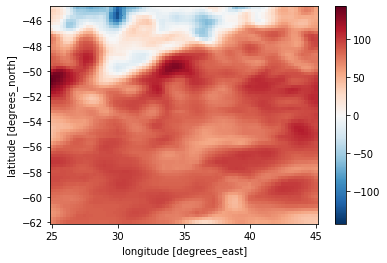

In [64]:
(surf_heat_flux.isel(time=slice(0,24)).mean('time')/3600).plot()

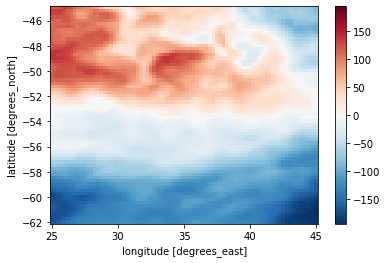

In [65]:
(surf_heat_flux.isel(time=slice(2400,2424)).mean('time')/3600).plot()

In [55]:
surf_S_flux = ds.e - ds.tp

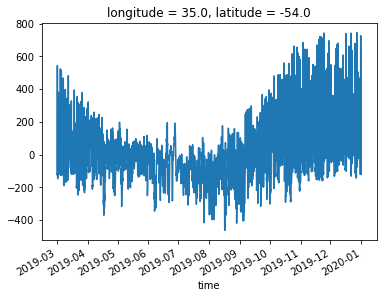

In [39]:
(surf_heat_flux.sel(longitude = 35, latitude=-54)/3600).plot()

In [56]:
surf_heat_flux_mean = (surf_heat_flux.sel(longitude = 35, latitude=-54)/3600).rolling(time=24, center=True).mean()
surf_S_flux_mean = (surf_S_flux.sel(longitude = 35, latitude=-54)/3600).rolling(time=24, center=True).mean()

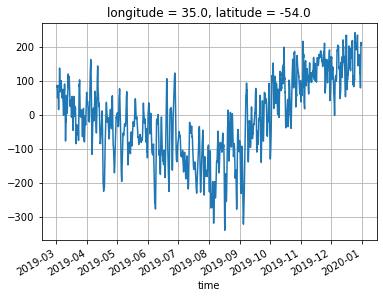

In [57]:
surf_heat_flux_mean.plot()
plt.grid()

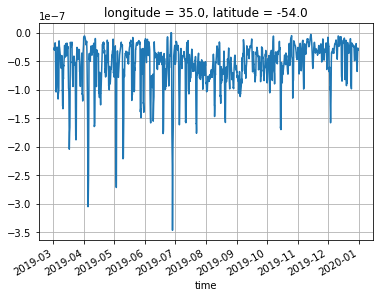

In [58]:
surf_S_flux_mean.plot()
plt.grid()

In [50]:
t = ds.time

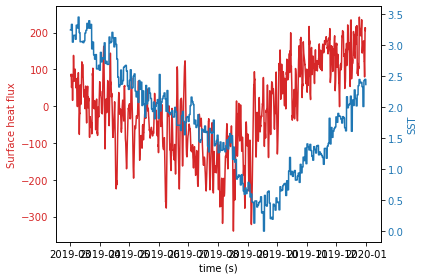

In [52]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Surface heat flux', color=color)
ax1.plot(t, surf_heat_flux_mean, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('SST', color=color)  # we already handled the x-label with ax1
ax2.plot(t, (ds.sst-273.15).sel(longitude = 35, latitude=-54), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()